In [78]:
# compare the errors for Gaussian and non-Gaussian experiments
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt


In [123]:
sensor  = 'atms'
exp_g   = 'new_ctrl_amsua_atms'
exp_ng  = 'shield_ensreplay_ng_only_scatter_wind_v0'

In [352]:
#rr=nc.Dataset("/home/Chih-Chi.Hu/diag_amsua_n15_anl.2022061400.nc4")
# Gaussian
if sensor == 'amsua':
    rr_g=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{sensor}/{exp_g}/diag_{sensor}_n19_ges.2022062000.nc4")
    rr_ng=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{sensor}/{exp_ng}/diag_{sensor}_n19_ges.2022062000.nc4")
if sensor == 'atms':
    rr_g=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{sensor}/{exp_g}/diag_{sensor}_n20_ges.2022061500.nc4")
    rr_ng=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{sensor}/{exp_ng}/diag_{sensor}_n20_ges.2022061500.nc4")



In [305]:
#print(rr)                  # get all info
#print(rr.variables.keys())   # get all variables names
#tt = rr.variables['Obs_Time'][:] ???
print(rr.variables.keys())   # get all variables names


NameError: name 'rr' is not defined

In [353]:
use_flag_g = rr_g.variables['use_flag'][:]
chidx_g    = rr_g.variables['Channel_Index'][:]
chinfoidx_g= rr_g.variables['chaninfoidx'][:]


use_flag_ng = rr_ng.variables['use_flag'][:]
chidx_ng    = rr_ng.variables['Channel_Index'][:]
chinfoidx_ng= rr_ng.variables['chaninfoidx'][:]
#print(use_flag)
#print(len(use_flag))
#print(chidx)
#print(len(chidx))
#print(chinfoidx)
#print(chidx==chinfoidx)


In [354]:
ch_g         = rr_g.variables['Channel_Index'][:]
inv_obserr_g = rr_g.variables['Inverse_Observation_Error'][:]
obserr_g     = rr_g.variables['Sym_Observation_Error'][:]
clw_obs_g    = rr_g.variables['clw_obs'][:]
clw_model_g  = rr_g.variables['clw_guess_retrieval'][:]
omf_g        = rr_g.variables['Obs_Minus_Forecast_adjusted'][:]
wspd_g       = rr_g.variables['Sfc_Wind_Speed'][:]
fland_g      = rr_g.variables['Land_Fraction'][:]
fwater_g     = rr_g.variables['Water_Fraction'][:]
symcloud_g   = 0.5*(clw_obs_g + clw_model_g)
qc_g         = rr_g.variables['QC_Flag'][:]

ch_ng         = rr_ng.variables['Channel_Index'][:]
inv_obserr_ng = rr_ng.variables['Inverse_Observation_Error'][:]
obserr_ng     = rr_ng.variables['Sym_Observation_Error'][:]
clw_obs_ng    = rr_ng.variables['clw_obs'][:]
clw_model_ng  = rr_ng.variables['clw_guess_retrieval'][:]
omf_ng        = rr_ng.variables['Obs_Minus_Forecast_adjusted'][:]
wspd_ng       = rr_ng.variables['Sfc_Wind_Speed'][:]
fland_ng      = rr_ng.variables['Land_Fraction'][:]
fwater_ng     = rr_ng.variables['Water_Fraction'][:]
symcloud_ng   = 0.5*(clw_obs_ng + clw_model_ng)
qc_ng         = rr_ng.variables['QC_Flag'][:]

#omf = rr.variables['Obs_Minus_Forecast_adjusted'][:]
#omf = rr.variables['Obs_Minus_Forecast_adjusted']
#print(omf)       # print var info
#omf.dimensions   # check var dimensions
#omf.shape        # check var dimensions (in number)
#omf_array = omf[:] # translate to numpy array
#omf_array.shape

In [363]:
chn     = 20
channel = 'ch20'

In [364]:
#use = np.where((qc == 3)&(ch==15))

sea_screen_g  = (fwater_g>= 0.99)
land_screen_g = (fland_g >= 0.01)
use_g = np.where((qc_g == 0)&(ch_g==chn)&sea_screen_g)

sea_screen_ng  = (fwater_ng>= 0.99)
land_screen_ng = (fland_ng >= 0.01)
use_ng = np.where((qc_ng == 0)&(ch_ng==chn)&sea_screen_ng)

use_both = np.where((qc_g == 0)&(ch_g==chn)&sea_screen_g&(qc_ng == 0)&(ch_ng==chn)&sea_screen_ng)
use_chn  = np.where((ch_g==chn) & (ch_ng==chn))

#print(use[0].shape)
obserr_use_g     = obserr_g[use_g]
inv_obserr_use_g = inv_obserr_g[use_g]
cloud_use_g      = symcloud_g[use_g]
omf_use_g        = omf_g[use_g]
wspd_use_g       = wspd_g[use_g]

obserr_use_ng     = obserr_ng[use_ng]
inv_obserr_use_ng = inv_obserr_ng[use_ng]
cloud_use_ng      = symcloud_ng[use_ng]
omf_use_ng        = omf_ng[use_ng]
wspd_use_ng       = wspd_ng[use_ng]

omf_both_ng = omf_ng[use_both]
omf_both_g  = omf_g [use_both]

omf_chn_ng = omf_ng[use_chn]
omf_chn_g  = omf_g [use_chn]

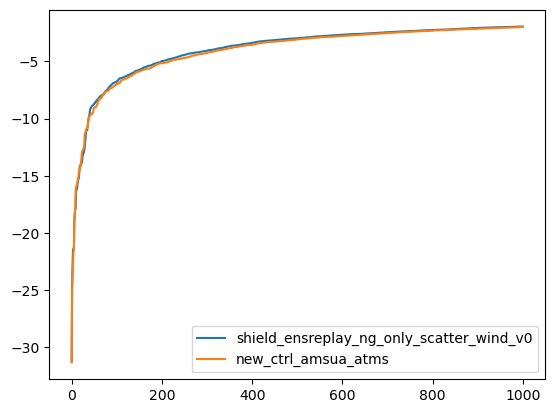

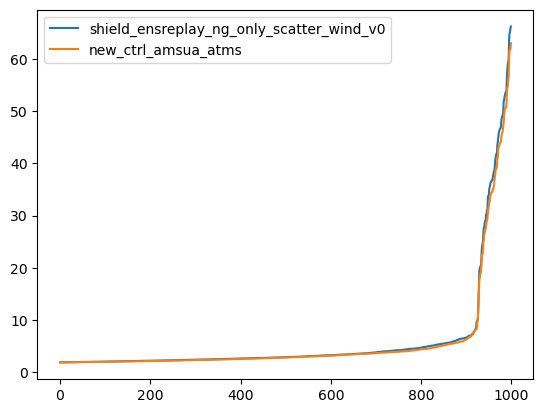

In [365]:
plt.plot(np.sort(omf_chn_ng[np.where(abs(omf_chn_ng)<1000)])[:1000],label=f'{exp_ng}')
plt.plot(np.sort(omf_chn_g [np.where(abs(omf_chn_g) <1000)])[:1000],label=f'{exp_g}')
plt.legend()
plt.show()

plt.plot(np.sort(omf_chn_ng[np.where(abs(omf_chn_ng)<1000)])[-1000:],label=f'{exp_ng}')
plt.plot(np.sort(omf_chn_g [np.where(abs(omf_chn_g) <1000)])[-1000:],label=f'{exp_g}')
plt.legend()
plt.show()

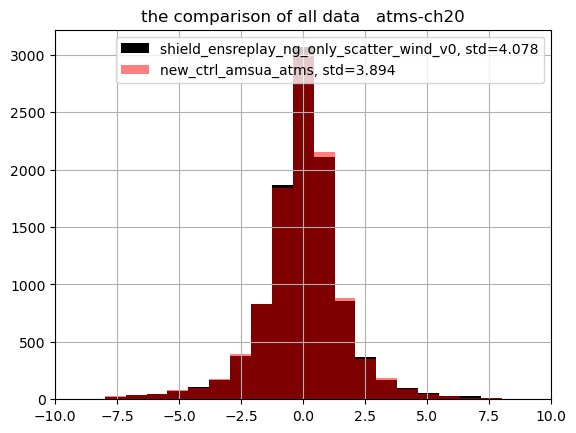

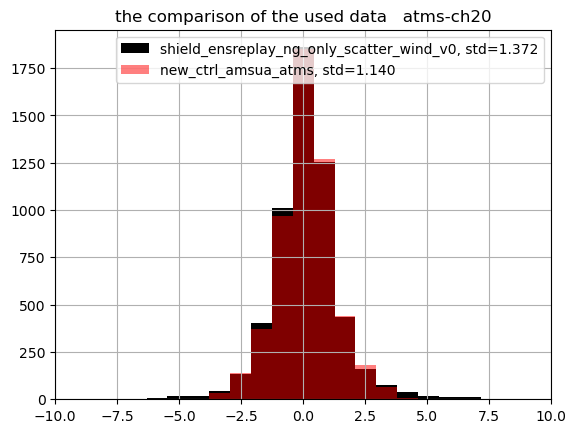

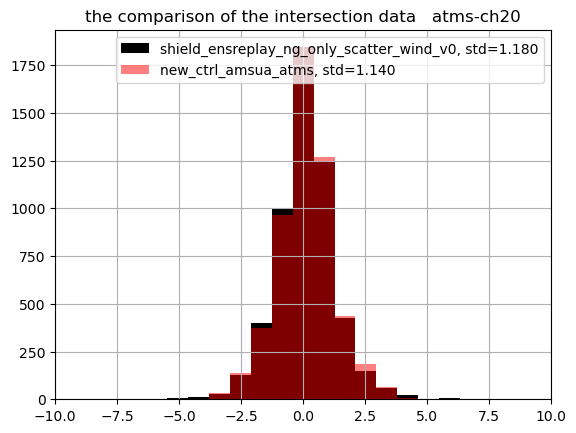

In [366]:
bins = np.linspace(-8, 8, 20)

ng_chn_std = np.std(omf_chn_ng[np.where(abs(omf_chn_ng)<1000)])
g_chn_std  = np.std(omf_chn_g[np.where(abs(omf_chn_g)<1000)])

plt.hist(omf_chn_ng, bins=bins, color='black',alpha=1.0, label=f'{exp_ng}, std={ng_chn_std:.3f}')
plt.hist(omf_chn_g, bins=bins, color='red', alpha=0.5,label=f'{exp_g}, std={g_chn_std:.3f}')
plt.xlim(-10,10)
plt.grid(True)
plt.title(f'the comparison of all data   {sensor}-{channel}')
plt.legend()
plt.show()

ng_used_std = np.std(omf_use_ng[np.where(abs(omf_use_ng)<1000)])
g_used_std  = np.std(omf_use_g[np.where(abs(omf_use_g)<1000)])

plt.hist(omf_use_ng, bins=bins, color='black',alpha=1.0,  label=f'{exp_ng}, std={ng_used_std:.3f}')
plt.hist(omf_use_g, bins=bins, color='red', alpha=0.5, label=f'{exp_g}, std={g_used_std:.3f}')
plt.xlim(-10,10)
plt.grid(True)
plt.legend()
plt.title(f'the comparison of the used data   {sensor}-{channel}')
plt.show()

ng_inter_std = np.std(omf_both_ng[np.where(abs(omf_both_ng)<1000)])
g_inter_std  = np.std(omf_both_g[np.where(abs(omf_both_g)<1000)])

plt.hist(omf_both_ng, bins=bins, color='black',alpha=1.0, label=f'{exp_ng}, std={ng_inter_std:.3f}')
plt.hist(omf_both_g, bins=bins, color='red', alpha=0.5, label=f'{exp_g}, std={g_inter_std:.3f}')
plt.xlim(-10,10)
plt.grid(True)
plt.legend()
plt.title(f'the comparison of the intersection data   {sensor}-{channel}')
plt.show()

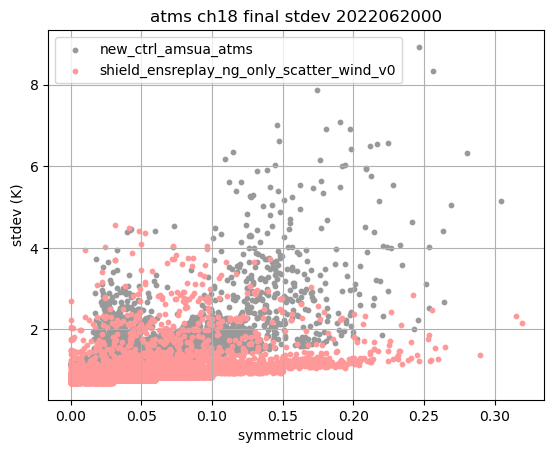

In [157]:
# compare the final errors (situation-dependent inflation applied) as a function of symmetric cloud

plt.scatter(cloud_use_g, 1/inv_obserr_use_g,  s=10, color=(0.6, 0.6, 0.6), label=f'{exp_g}')
#plt.scatter(cloud_use_g, obserr_use_g,       s=10, color=(0.0, 0.0, 0.0), label='original stdev (Gaussian)')
plt.scatter(cloud_use_ng, 1/inv_obserr_use_ng,s=10, color=(1.0, 0.6, 0.6), label=f'{exp_ng}')
#plt.scatter(cloud_use_ng, obserr_use_ng,     s=10, color=(0.6, 0.0, 0.0), label='original stdev (non-Gaussian)')
plt.xlabel('symmetric cloud')
plt.ylabel('stdev (K)')
plt.grid(True)
plt.title(f'{sensor} {channel} final stdev 2022062000')
plt.legend()
#plt.savefig(f'final_stdev_symcloud_{exp_g}_vs_{exp_ng}_{sensor}_{channel}.png')

plt.show()



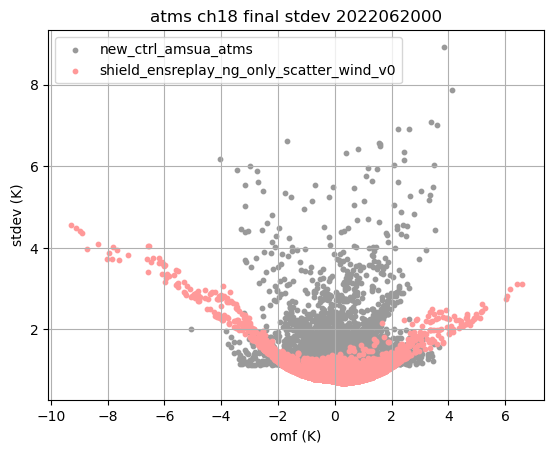

In [158]:
# compare the final errors (situation-dependent inflation applied) as a function of omf

plt.scatter(omf_use_g, 1/inv_obserr_use_g,  s=10, color=(0.6, 0.6, 0.6), label=f'{exp_g}')
#plt.scatter(cloud_use_g, obserr_use_g,       s=10, color=(0.0, 0.0, 0.0), label='original stdev (Gaussian)')
plt.scatter(omf_use_ng, 1/inv_obserr_use_ng,s=10, color=(1.0, 0.6, 0.6), label=f'{exp_ng}')
#plt.scatter(cloud_use_ng, obserr_use_ng,     s=10, color=(0.6, 0.0, 0.0), label='original stdev (non-Gaussian)')
plt.xlabel('omf (K)')
plt.ylabel('stdev (K)')
plt.grid(True)
plt.title(f'{sensor} {channel} final stdev 2022062000')
plt.legend()
#plt.savefig(f'final_stdev_omf_{exp_g}_vs_{exp_ng}_{sensor}_{channel}.png')

plt.show()



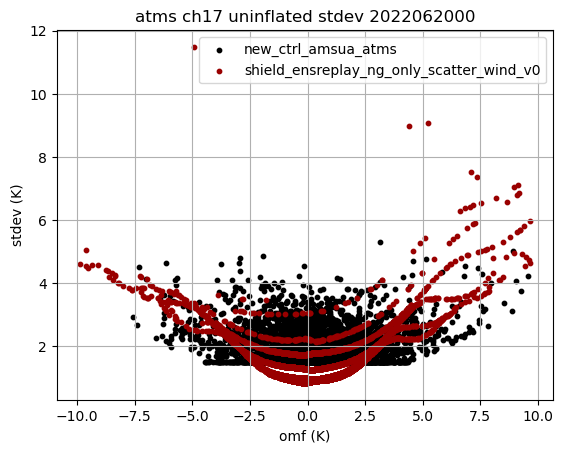

In [152]:
# plot the orignal errors (uninflated*, no situation-dependent inflation applied) as a function of omf

#plt.scatter(omf_use_g, 1/inv_obserr_use_g,  s=10, color=(0.6, 0.6, 0.6), label='situ-inflated stdev (Gaussian)')
plt.scatter(omf_use_g, obserr_use_g,       s=10, color=(0.0, 0.0, 0.0), label=f'{exp_g}')
#plt.scatter(omf_use_ng, 1/inv_obserr_use_ng,s=10, color=(1.0, 0.6, 0.6), label='situ-inflated stdev (non-Gaussian)')
plt.scatter(omf_use_ng, obserr_use_ng,     s=10, color=(0.6, 0.0, 0.0), label=f'{exp_ng}')
plt.xlabel('omf (K)')
plt.ylabel('stdev (K)')
plt.grid(True)
plt.title(f'{sensor} {channel} uninflated stdev 2022062000')
plt.legend()
#plt.savefig(f'orig_stdev_omf_{exp_g}_vs_{exp_ng}_{sensor}_{channel}.png')

plt.show()


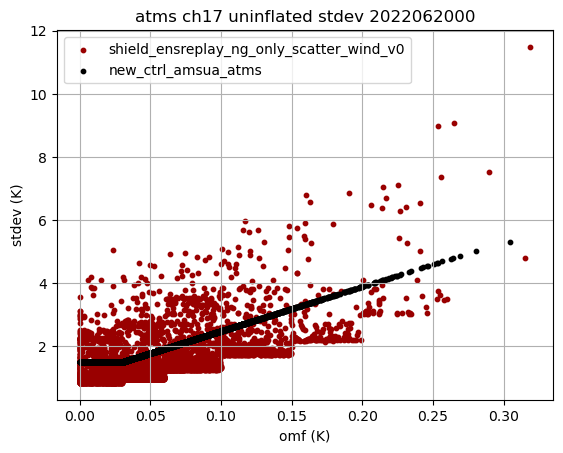

In [153]:
# plot the orignal errors (uninflated*, no situation-dependent inflation applied) as a function of symmetric cloud

#plt.scatter(omf_use_g, 1/inv_obserr_use_g,  s=10, color=(0.6, 0.6, 0.6), label='situ-inflated stdev (Gaussian)')
#plt.scatter(omf_use_ng, 1/inv_obserr_use_ng,s=10, color=(1.0, 0.6, 0.6), label='situ-inflated stdev (non-Gaussian)')
plt.scatter(cloud_use_ng, obserr_use_ng,     s=10, color=(0.6, 0.0, 0.0), label=f'{exp_ng}')
plt.scatter(cloud_use_g, obserr_use_g,       s=10, color=(0.0, 0.0, 0.0), label=f'{exp_g}')
plt.xlabel('omf (K)')
plt.ylabel('stdev (K)')
plt.grid(True)
plt.title(f'{sensor} {channel} uninflated stdev 2022062000')
plt.legend()
#plt.savefig(f'orig_stdev_symcloud_{exp_g}_vs_{exp_ng}_{sensor}_{channel}.png')

plt.show()

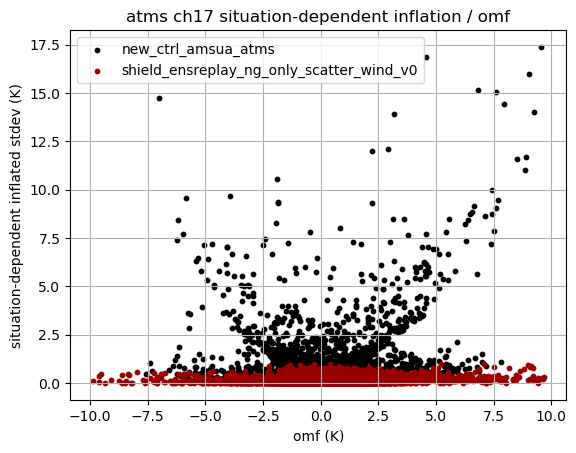

In [154]:
# diagnostics of "situation dependent inflated errors"
# the inflation as a function of omf:

derr_g  = 1/inv_obserr_use_g -obserr_use_g
derr_ng = 1/inv_obserr_use_ng-obserr_use_ng

plt.scatter(omf_use_g,  derr_g , s=10, color=(0.0, 0.0, 0.0), label = f'{exp_g}') 
plt.scatter(omf_use_ng, derr_ng, s=10, color=(0.6, 0.0, 0.0), label = f'{exp_ng}')
plt.xlabel('omf (K)')
plt.ylabel('situation-dependent inflated stdev (K)')
plt.title(f'{sensor} {channel} situation-dependent inflation / omf')
plt.legend()
plt.grid(True)
plt.savefig(f'inflation_amount_{exp_g}_vs_{exp_ng}_{sensor}_{channel}.png')

plt.show()



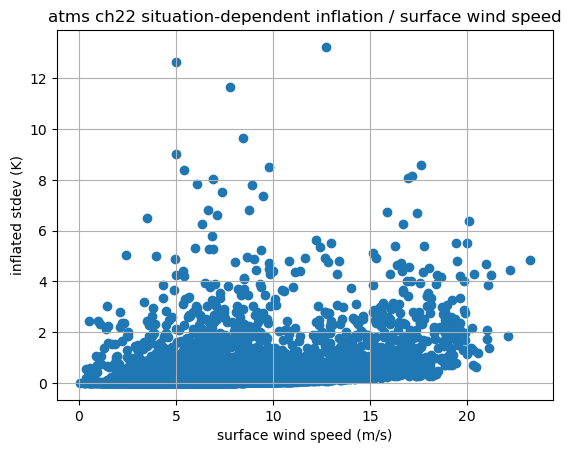

In [17]:
# diagnostics of "situation dependent inflated errors"
# the inflation as a function of surface wind speed:

derr = 1/inv_obserr_use_g-obserr_use_g

plt.scatter(wspd_use_g, derr)
plt.xlabel('surface wind speed (m/s)')
plt.ylabel('inflated stdev (K)')
plt.title(f'{sensor} {channel} situation-dependent inflation / surface wind speed')
plt.grid(True)
plt.show()


In [599]:
def inquire_nongauss_table(table_name, input_cld, input_innov):

    # first read table in:
    read_cloud_bin_next = False
    read_bias_next      = False
    read_stdev_next     = False
    ct = 0
    with open(table_name, 'r') as file:
        # Read the file line by line into a list
        lines = file.readlines()
    
        # Process each line
        for line in lines:
            # basic parameters
            if line[0:9] == 'max_range':
                max_range = float(line[17:])
            elif line[0:2] == 'dx':
                dx        = float(line[17:])
            elif line[0:9] == 'bdy_slope':
                bdy_slope = float(line[17:])
            elif line[0:13] == 'num_cloud_cat':
                num_cloud_cat = float(line[17:])
                stdev = np.zeros((int(num_cloud_cat), 2*int(max_range/dx)+1))
        
            # cloud bin
            if line[0:11] == 'cloud_bin::':
                read_cloud_bin_next = True
                continue
            
            if read_cloud_bin_next:
                cloud_bin = np.array(line.split(), dtype=np.float64)
                read_cloud_bin_next = False
        
            if line[0:6] == 'bias::':
                read_bias_next = True
                continue
            
            if read_bias_next:
                bias = np.array(line.split(), dtype=np.float64)
                read_bias_next = False
            
            if line[0:7] == 'stdev::':
                read_stdev_next = True
                continue
            
            if read_stdev_next:
                stdev[ct,:] = np.array(line.split(), dtype=np.float64)
                ct+=1
                if ct>=num_cloud_cat:
                    read_stdev_next = False
                    
    
    # then interpolate the table to get the standard deviation:
    cc = int(min(num_cloud_cat-1, np.where(input_cld - cloud_bin >= 0)[0][-1]))

    # move the innovation to 'mode relative innovation':
    input_innov = input_innov + bias[cc]
    
    # interpolate to get the stdev:
    if input_innov <= -max_range:
        output_stdev = stdev[cc,0] + bdy_slope*(-max_range - input_innov)
    elif input_innov >= max_range:
        output_stdev = stdev[cc,-1] + bdy_slope*(input_innov - max_range)
    else:
        output_stdev = np.interp(input_innov, np.arange(-max_range, max_range+dx, dx), stdev[cc,:] )

    return output_stdev



In [737]:
table_err = np.zeros(len(cloud_use_ng))
for i in range(len(cloud_use_ng)):
    #table_err[i] = inquire_nongauss_table('/home/Chih-Chi.Hu/python_codes/non_Gaussian_amsua_ch1_OmF_sym_cld_qc_00_03.txt', cloud_use[i], omf_use[i])
    table_err[i] = inquire_nongauss_table(f'/home/Chih-Chi.Hu/python_codes/non_Gaussian_{sensor}_ch18_OmF_sym_cld_qc_00_03.txt', cloud_use_ng[i], omf_use_ng[i])

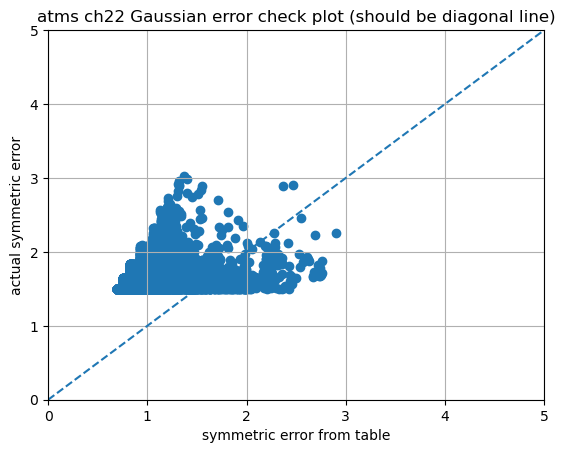

In [738]:
# sanity check plot
# plot the error predicted by error table versus the errors that are actually stored in the netcdf file:

plt.scatter(table_err, obserr_use_ng)
plt.plot([0,70],[0,70],linestyle='--')
#plt.axis([0,20,0,20])
plt.axis([0,5,0,5])
#plt.axis([0,10,0,10])
plt.xlabel('symmetric error from table')
plt.ylabel('actual symmetric error')
plt.grid(True)
plt.title(f'{sensor} {channel} {errm} error check plot (should be diagonal line)')
plt.show()

In [ ]:
#plt.plot(obserr_use)
#plt.plot(1/inv_obserr_use)
plt.scatter(obserr_use, 1/inv_obserr_use)
plt.plot([0,70],[0,70],linestyle='--')
plt.axis([0,20,0,20])
plt.xlabel('Symmetric error model')
plt.ylabel('final obs error')
plt.show()


In [ ]:
#plt.plot(obserr_use)
#plt.plot(1/inv_obserr_use)
plt.scatter(obserr_use, 1/inv_obserr_use)
plt.plot([0,70],[0,70],linestyle='--')
plt.axis([0,20,0,20])
plt.xlabel('Symmetric error model')
plt.ylabel('final obs error')
plt.show()

In [ ]:
plt.hist(1/inv_obserr_use - obserr_use)

In [ ]:
clw_obs = rr.variables['clw_obs'][:]
plt.hist(omf[np.where((clw_obs>0.7)&(clw_obs<1))],bins=np.arange(-15,15,1))
plt.show()

In [ ]:
from matplotlib.tri import Triangulation

# examine the 2d innovation-symmetric cloud distribution of the data:
x = omf_use
y = cloud_use
z = obserr_use

# Create a triangulation of the (x, y) points
triang = Triangulation(x, y)

# Create a contour plot using triangulated data
contour_plot = plt.tricontour(triang, z, cmap='viridis')

# Add labels and a color bar
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Contour Plot with Irregularly Spaced Data')
plt.colorbar(contour_plot, label='Z-axis')


In [ ]:
test_cld   = [0.0, 0.01, 0.08, 0.15, 0.45, 1.00] 
test_innov = [5.0, 15.0, -15.0, 22.0, -6.0, 2.5]

for i in range(len(test_cld)):
    print(inquire_nongauss_table('/home/Chih-Chi.Hu/test_files/cloudy_radiance_info_shield_non_gaussian.txt', test_cld[i], test_innov[i]))
          